In [1]:
import copy



def deltaN(n):
    half = floor(n/2)+1
    deltaN = []
    v_0 = []
    for i in range(n):
        deltaN.append([])
        v_0.append(i)
    deltaN.append([])
    deltaN.append([])
    deltaN[half]=v_0
    return deltaN



# ChatGPT Prompt: Write me a SageMath code that will take in a list of sets and return a list of all the pairs of numbers that appear in the same set from the inputted list

# Modified to deal with the fact that you can't do len(object of type set)

def find_pairs(config):
    pairs = []
    for v in config:
        # Generate all unique pairs within set `s`
        for i in range(len(v)):
            for j in range(i + 1, len(v)):
                pairs.append((v[i], v[j]))
    return pairs

# Example
# config = [[0,1,2],[],[]]
# print(find_pairs(config))




# ChatGPT Prompt: Now write me a code that will take in a list of vectors and two numbers, and if those two numbers appear together in the same vector, the larger of the two numbers will be moved from that vector to the previous vector in the list. If the vector that the numbers appear in together is not the last vector in the list, then the smaller of the two numbers will be moved from that vector to the next vector in the list. If the two numbers do not appear in the same vector, print "not firable"

# Modified after generation

def fireIJ(config, num1, num2):
    outConfig = []
    for u in config:
        outConfig.append(copy.deepcopy(u))
    if num1 == num2:
        return None
    else:
        pass
    for i, v in enumerate(outConfig):
        if num1 in v and num2 in v:
            v.remove(min(num1, num2))
            v.remove(max(num1, num2))
            outConfig[i - 1].append(min(num1, num2))
            outConfig[i + 1].append(max(num1, num2))

            # Sort each sublist in config after modification
            for sublist in outConfig:
                sublist.sort()

            return outConfig
    return None



# ChatGPT prompt: write a function that will take in a list of lists called inConfig, and then use the function you wrote called find_pairs to find all the pairs of numbers that appear in the same sublist. Then, for each pair, use the function you wrote called move_numbers_in_vectors with inputs inConfig and the pair of numbers to get a new list for each pair. Record all of these lists in a list called reachableConfigs. Then, repeat this process to each of the new lists, and continue until none of the new lists have any pairs of numbers that appear in the same sublist. Then output "Done"

# Modified after generation

def generate_reachable_configs(config):
    reachableConfigs = [config]  # Start with the original config in the list
    new_configs_found = True

    while new_configs_found:
        new_configs_found = False  # Assume no new configs found unless proven otherwise

        # Loop through each configuration in reachableConfigs
        for current_config in reachableConfigs[:]:  # Use a slice to avoid modifying list while iterating
            # Get all pairs from the current configuration using find_pairs
            pairs = find_pairs(current_config)

            # Check each pair
            for num1, num2 in pairs:
                # Apply fireIJ to get a new configuration
                new_config = fireIJ([sublist[:] for sublist in current_config], num1, num2)

                # If new_config is valid and not already in reachableConfigs, add it
                if new_config is not None and new_config not in reachableConfigs:
                    reachableConfigs.append(new_config)
                    new_configs_found = True  # We found a new config, so continue the loop

        # Stop when no new configurations were added in the last round
    return reachableConfigs

In [2]:
# Example
config = deltaN(3)
reached = generate_reachable_configs(config)
for item in reached:
    print(item)

[[], [], [0, 1, 2], [], []]
[[], [0], [2], [1], []]
[[], [0], [1], [2], []]
[[], [1], [0], [2], []]


In [3]:
# ChatGPT prompt: I want to write a function using the code from my last message to write a function that will take two inputs called config and enn, run generate_reachable_configs on config to get a list called reachableConfigs, and then create a list of tuples of the form (i,j) where i and j are indices of items in reachableConfigs such that reachableConfigs[j] is the result of running fireIJ(reachableConfigs[i],k,l) where k and l are any two positive integers less than or equal to enn but not equal to each other

# Modified after generation

def genEdges(config):
# find n
    n = max(max(sublist) for sublist in config if sublist)+1
# get all the reachable configurations from config
    reachableConfigs = generate_reachable_configs(config)
# get the number of reachable configurations
    numVertices = len(reachableConfigs)
    edges = []
# for every pair of reachable configurations (i and j) and every two pairs of chips (k and ell),
# check if configuration j is equal to configuration i but with chips k and ell fired
    for i in range(numVertices):
        reached = reachableConfigs[i]
        check_pairs = find_pairs(reached)
        for pair in check_pairs:
            firedConfig = fireIJ(reached,pair[0],pair[1])
            if firedConfig in reachableConfigs and [i,reachableConfigs.index(firedConfig)] not in edges:
                edges.append([i,reachableConfigs.index(firedConfig)])
            else:
                pass
    return edges



def edgeToHasse(edges):
    graph = DiGraph(edges)
    poset = Poset(graph)
    return poset

def getPosetInfo(poset):
    print(f"check gradedness (should be true by global confluence): {poset.is_graded()}")
    print(f"total states: {poset.cardinality()}")
    print(f"total relations (not counting multiplicity for config.s reached by multiple different firings): {poset.relations_number()}")
    print(f"length of maximal chains: {poset.rank()}")
    # print(f"number of paths to stable: {len(poset.maximal_chains())}") # only runs well for small n (like, probably 5 or less)

check gradedness (should be true by global confluence): True
total states: 4
total relations (not counting multiplicity for config.s reached by multiple different firings): 7
length of maximal chains: 1
n=3, starting with Delta^3 configuration


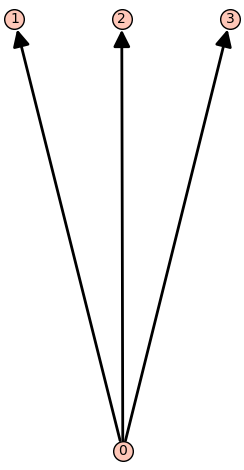

In [4]:
# Example
config = deltaN(3)
edges = genEdges(config)
# print(edges)
poset_3 = edgeToHasse(edges)
getPosetInfo(poset_3)
print("n=3, starting with Delta^3 configuration")
poset_3.show()

check gradedness (should be true by global confluence): True
total states: 15
total relations (not counting multiplicity for config.s reached by multiple different firings): 76
length of maximal chains: 5
n=4, starting with Delta^4 configuration


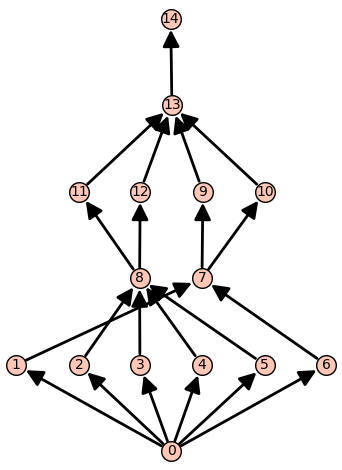

In [5]:
# Second example
config_4 = deltaN(4)
edges_4 = genEdges(config_4)
poset_4 = edgeToHasse(edges_4)
getPosetInfo(poset_4)
print("n=4, starting with Delta^4 configuration")
poset_4.show()

n=5, starting with Delta^5 configuration
check gradedness (should be true by global confluence): True
total states: 56
total relations (not counting multiplicity for config.s reached by multiple different firings): 573
length of maximal chains: 5


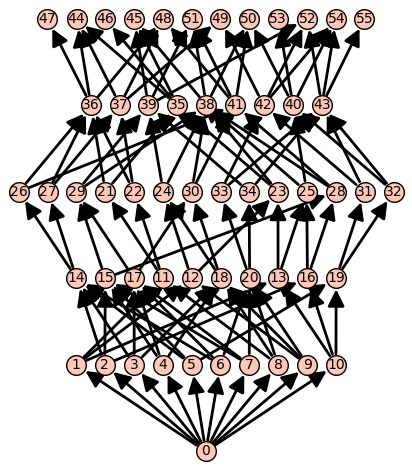

In [6]:
# genEdges(deltaN(5))
print("n=5, starting with Delta^5 configuration")
poset_5 = edgeToHasse(genEdges(deltaN(5)))
getPosetInfo(poset_5)
poset_5.show()

n=6, starting with Delta^6 configuration
check gradedness (should be true by global confluence): True
total states: 289
total relations (not counting multiplicity for config.s reached by multiple different firings): 11462
length of maximal chains: 14


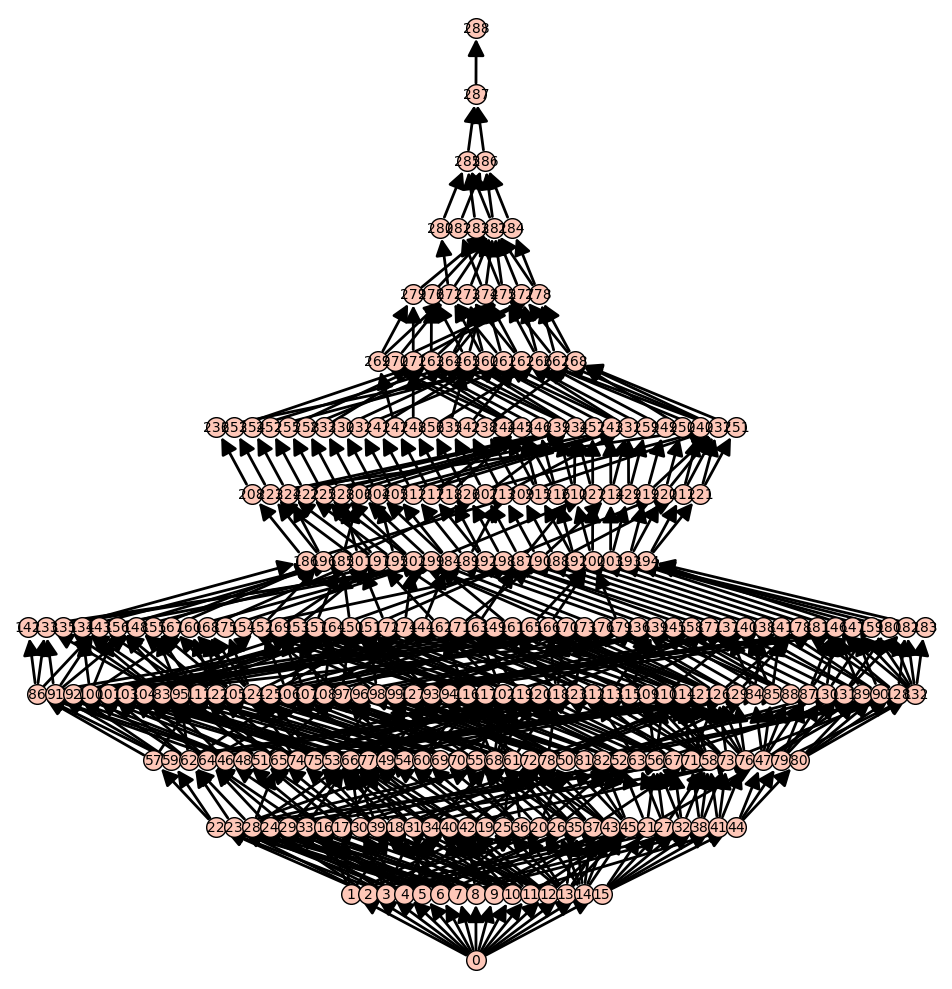

In [7]:
print("n=6, starting with Delta^6 configuration")
poset_6 = edgeToHasse(genEdges(deltaN(6)))
getPosetInfo(poset_6)
poset_6.show(figsize=[20,10])